In [ ]:
pip install cantera

In [ ]:
#ct.__version__

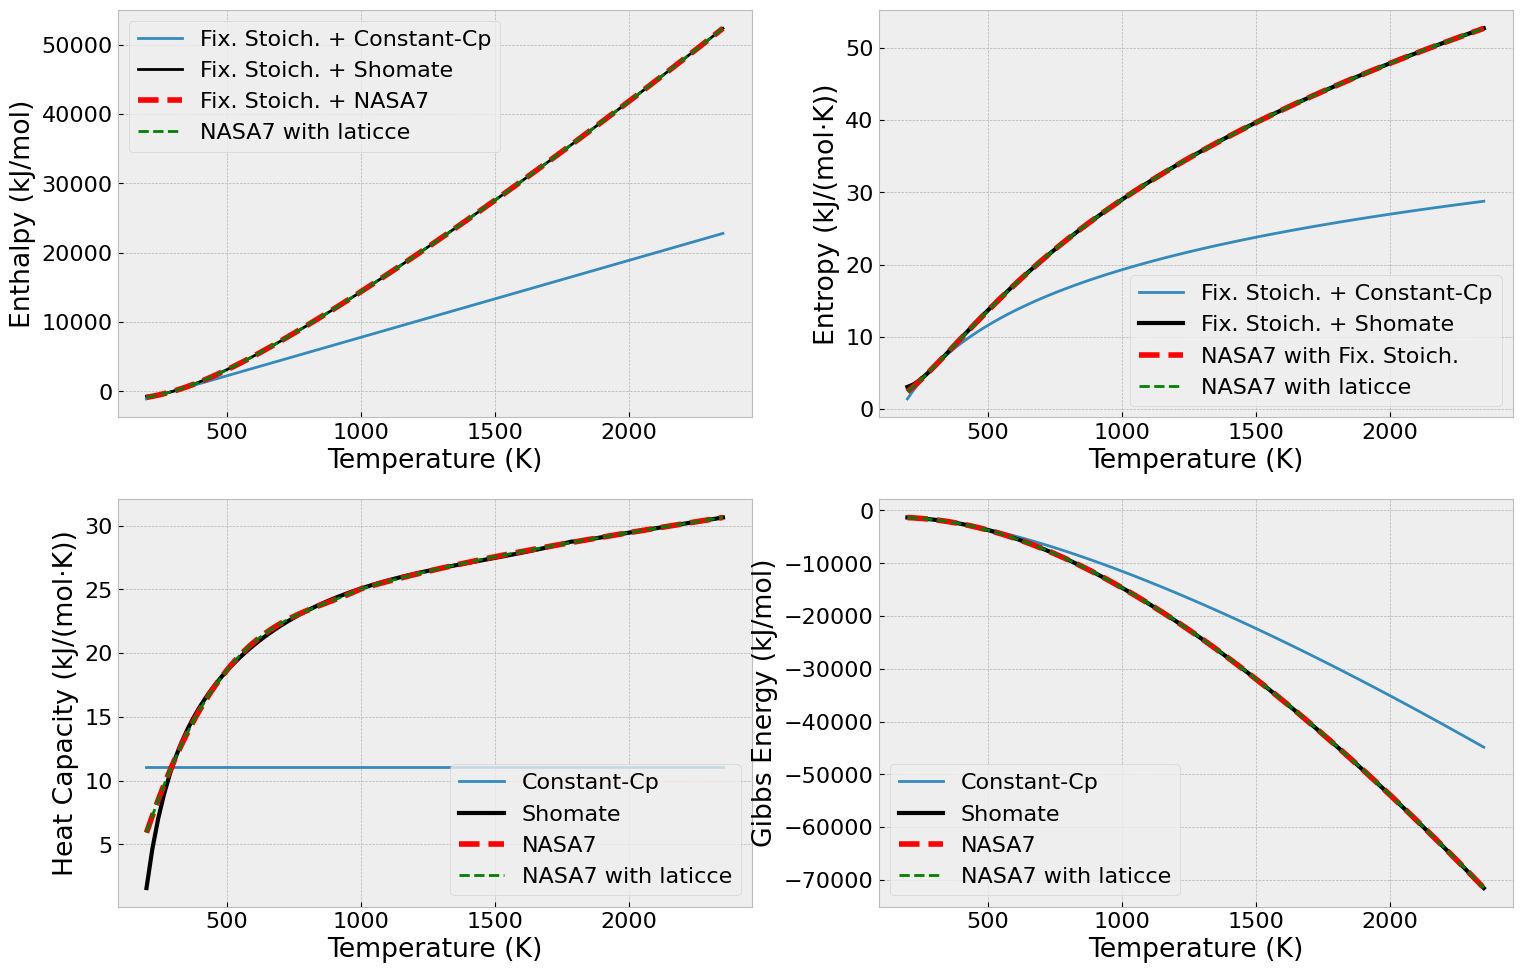

In [3]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

yaml_fixed_stoichiometry = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry
  elements: [B]
  species: [B(s)]
  density: 2340
  note: Solid boron phase

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: constant-cp
    h0: 0
    s0: 5860
    cp0: 11100
"""
yaml_shomate = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry
  elements: [B]
  species: [B(s)]
  density: 2340
  note: Solid boron phase

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: Shomate
    note: α-бора
    temperature-ranges: [298.0, 1800, 2350]
    data:
    - [10.18574	, 29.24415, -18.02137, 4.212326	, -0.550999	,-6.036299,7.089077]
    - [25.12664, 1.975493, 0.338395, -0.040032, -2.635578, -14.43597, 25.59930]
"""
yaml_nasa7 = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry #StoichSubstance
  elements: [B]
  species: [B(s)]
  density: 2340

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: NASA7
    temperature-ranges: [200.0, 1000.0, 2350]  # 2 диапазона температур
    data:
    - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]  # 200-1000 K
    - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]  # 1000-2350 K
"""

yaml_lattice = """
phases:
  - name: solid_boron
    thermo: lattice
    species: [B(s)]
    state:
      T: 298.15
      P: 101325
    site-density: 0.020  # значение в mol/cm^3, необходимо уточнить по данным
species:
  - name: B(s)
    composition: {B: 1}
    thermo:
      model: NASA7
      temperature-ranges: [200.0, 1000.0, 2350]  # 2 диапазона температур
      data:
      - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]  # 200-1000 K
      - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]  # 1000-2350 K
    transport:
      model: none
    equation-of-state:
      model: constant-volume
      molar-volume: 4.6e-6  # значение в m^3/mol, необходимо уточнить по данным
"""

def generate_and_plot():
    boron_const = ct.Solution(yaml=yaml_fixed_stoichiometry)
    boron_shomate = ct.Solution(yaml=yaml_shomate)
    boron_nasa = ct.Solution(yaml=yaml_nasa7)
    boron_laticce = ct.Solution(yaml=yaml_lattice)

    temperatures = np.linspace(200, 2350, 100)


    h_const, s_const, cp_const, g_const = [], [], [], []
    for T in temperatures:
        boron_const.TP = T, ct.one_atm
        h_const.append(boron_const.enthalpy_mole)
        s_const.append(boron_const.entropy_mole)
        cp_const.append(boron_const.cp_mole)
        g_const.append(boron_const.gibbs_mole)

    h_shomate, s_shomate, cp_shomate, g_shomate = [], [], [], []
    for T in temperatures:
        boron_shomate.TP = T, ct.one_atm
        h_shomate.append(boron_shomate.enthalpy_mole)
        s_shomate.append(boron_shomate.entropy_mole)
        cp_shomate.append(boron_shomate.cp_mole)
        g_shomate.append(boron_shomate.gibbs_mole)

    h_nasa, s_nasa, cp_nasa, g_nasa, density_fixed = [], [], [], [], []
    for T in temperatures:
        boron_nasa.TP = T, ct.one_atm
        h_nasa.append(boron_nasa.enthalpy_mole)
        s_nasa.append(boron_nasa.entropy_mole)
        cp_nasa.append(boron_nasa.cp_mole)
        g_nasa.append(boron_nasa.gibbs_mole)
        density_fixed.append(boron_nasa.density_mole)

    h_laticce, s_laticce, g_laticce, cp_laticce, density_laticce = [], [], [], [], []
    for T in temperatures:
        boron_laticce.TP = T, ct.one_atm
        h_laticce.append(boron_laticce.enthalpy_mole)
        s_laticce.append(boron_laticce.entropy_mole)
        g_laticce.append(boron_laticce.gibbs_mole)
        cp_laticce.append(boron_laticce.cp_mole)
        density_laticce.append(boron_laticce.density_mole)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
    })
    plt.figure(figsize=(18, 18))
    plt.style.use("bmh")

    #Энтальпия
    plt.subplot(3, 2, 1)
    plt.plot(temperatures, np.array(h_const)/1000, label='Fix. Stoich. + Constant-Cp')
    plt.plot(temperatures, np.array(h_shomate)/1000, label='Fix. Stoich. + Shomate', color="black", linewidth=2)
    plt.plot(temperatures, np.array(h_nasa)/1000, label='Fix. Stoich. + NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(h_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Enthalpy (kJ/mol)')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #Энтропия
    plt.subplot(3, 2, 2)
    plt.plot(temperatures, np.array(s_const)/1000, label='Fix. Stoich. + Constant-Cp')
    plt.plot(temperatures, np.array(s_shomate)/1000, label='Fix. Stoich. + Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(s_nasa)/1000, label='NASA7 with Fix. Stoich.',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(s_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Entropy (kJ/(mol·K))')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #цп
    plt.subplot(3, 2, 3)
    plt.plot(temperatures, np.array(cp_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(cp_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(cp_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(cp_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity (kJ/(mol·K))')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #Гиббс
    plt.subplot(3, 2, 4)
    plt.plot(temperatures, np.array(g_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(g_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(g_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(g_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Gibbs Energy (kJ/mol)')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)
"""
    #Плотность
    plt.subplot(3, 2, 5)
    plt.plot(temperatures, np.array(density_fixed)/1000, label='Fixeds-toichiometry',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(density_laticce)/1000, label='Laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Плотность (kmol/m3)')
    plt.legend()

    plt.tight_layout()
    plt.savefig("boron_comparison.png")
    plt.show()
"""
generate_and_plot()

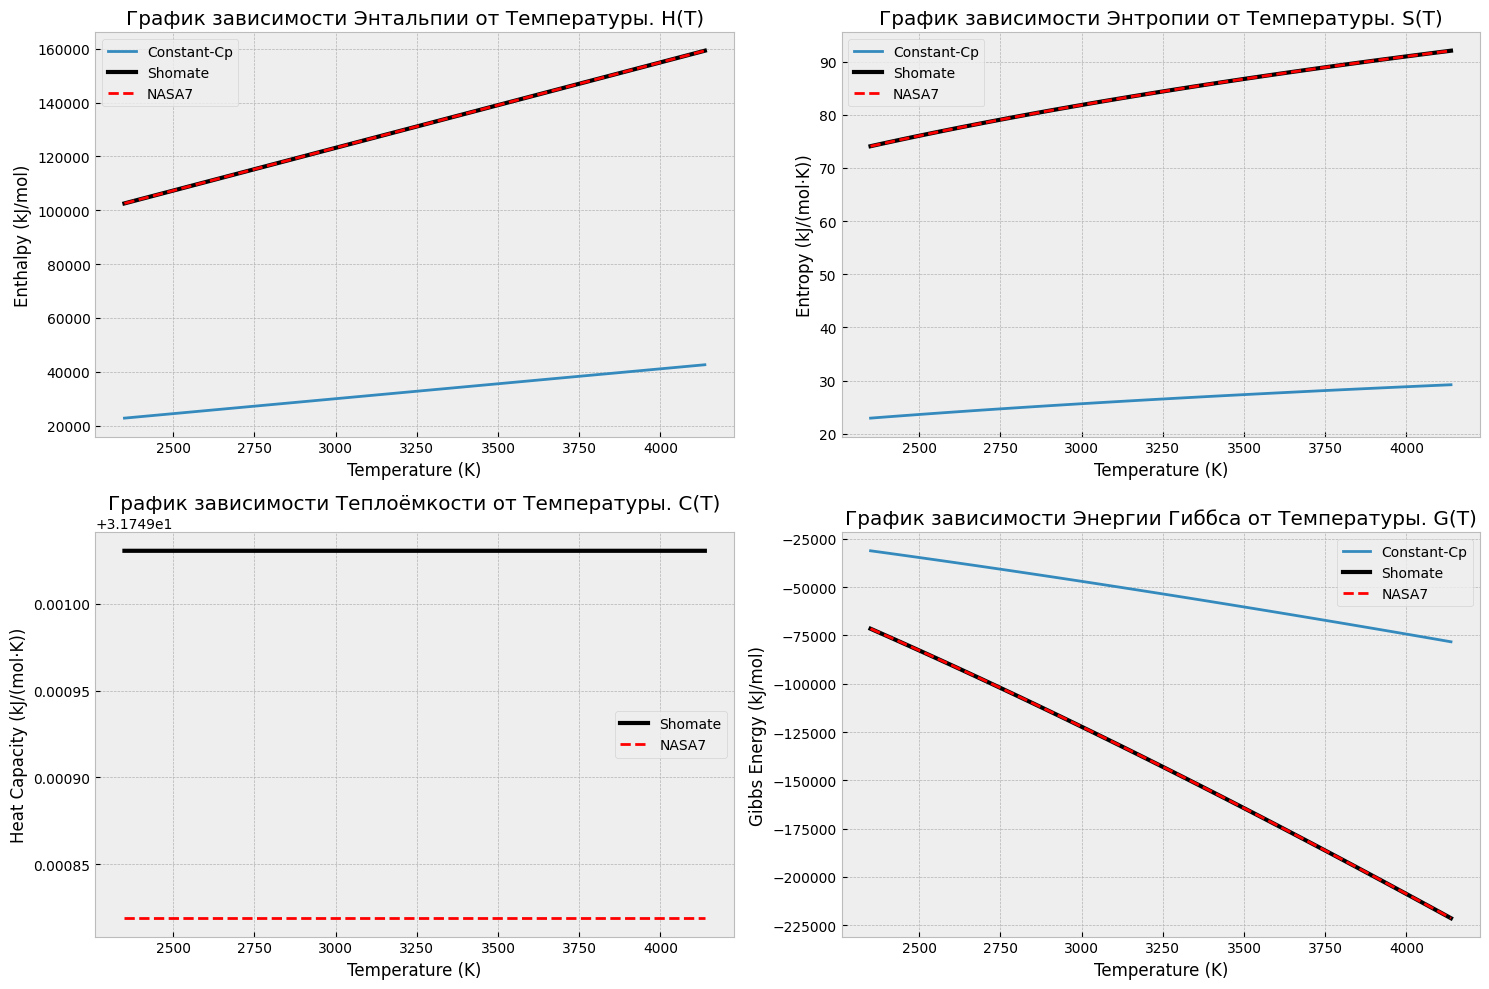

In [4]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

yaml_fixed_stoichiometry = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry
  elements: [B]
  species: [B(s)]
  density: 2070
  note: Solid boron phase

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: constant-cp
    h0: 48.93
    s0: 26.54
    cp0: 11100
"""
yaml_shomate = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry
  elements: [B]
  species: [B(s)]
  density: 2070
  note: Solid boron phase

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: Shomate
    note: #Жидкий
    temperature-ranges: [2350,4137.895]
    data:
    - [31.75003, 2.556E-7, -6.456792E-8, 5.616644E-9, 2.705970E-7, 27.94205, 46.94741]
"""
yaml_nasa7 = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry #StoichSubstance
  elements: [B]
  species: [B(s)]
  density: 2070

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: NASA7
    temperature-ranges: [2350, 6000]  # 2 диапазона температур
    data:
    - [3.81862551E+00, 0.00000000E+00, 0.00000000E+00, 0.00000000E+00, 0.00000000E+00, 3.36060019E+03, -2.07322599E+01]
"""

def generate_and_plot():
    boron_const = ct.Solution(yaml=yaml_fixed_stoichiometry)
    boron_shomate = ct.Solution(yaml=yaml_shomate)
    boron_nasa = ct.Solution(yaml=yaml_nasa7)

    temperatures = np.linspace(2350, 4137, 100)


    h_const, s_const, cp_const, g_const = [], [], [], []
    for T in temperatures:
        boron_const.TP = T, ct.one_atm
        h_const.append(boron_const.enthalpy_mole)
        s_const.append(boron_const.entropy_mole)
        cp_const.append(boron_const.cp_mole)
        g_const.append(boron_const.gibbs_mole)

    h_shomate, s_shomate, cp_shomate, g_shomate = [], [], [], []
    for T in temperatures:
        boron_shomate.TP = T, ct.one_atm
        h_shomate.append(boron_shomate.enthalpy_mole)
        s_shomate.append(boron_shomate.entropy_mole)
        cp_shomate.append(boron_shomate.cp_mole)
        g_shomate.append(boron_shomate.gibbs_mole)

    h_nasa, s_nasa, cp_nasa, g_nasa = [], [], [], []
    for T in temperatures:
        boron_nasa.TP = T, ct.one_atm
        h_nasa.append(boron_nasa.enthalpy_mole)
        s_nasa.append(boron_nasa.entropy_mole)
        cp_nasa.append(boron_nasa.cp_mole)
        g_nasa.append(boron_nasa.gibbs_mole)

    plt.figure(figsize=(15, 10))
    plt.style.use("bmh")

    #Энтальпия
    plt.subplot(2, 2, 1)
    plt.plot(temperatures, np.array(h_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(h_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(h_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Enthalpy (kJ/mol)')
    plt.title("График зависимости Энтальпии от Температуры. H(T)")
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #Энтропия
    plt.subplot(2, 2, 2)
    plt.plot(temperatures, np.array(s_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(s_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(s_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Entropy (kJ/(mol·K))')
    plt.title("График зависимости Энтропии от Температуры. S(T)")
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #цп
    plt.subplot(2, 2, 3)
    #plt.plot(temperatures, np.array(cp_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(cp_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(cp_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity (kJ/(mol·K))')
    plt.title("График зависимости Теплоёмкости от Температуры. C(T)")
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #Гиббс
    plt.subplot(2, 2, 4)
    plt.plot(temperatures, np.array(g_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(g_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(g_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Gibbs Energy (kJ/mol)')
    plt.title("График зависимости Энергии Гиббса от Температуры. G(T)")
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.savefig("boron_comparison.png")
    plt.show()

generate_and_plot()

In [ ]:
yaml_nasa7 = """
phases:
- name: boron_condensed
  thermo: fixed-stoichiometry #StoichSubstance
  elements: [B]
  species: [B(s)]
  density: 2340

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: NASA7
    temperature-ranges: [200.0, 1000.0, 2350]  # 2 диапазона температур
    data:
    - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]  # 200-1000 K
    - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]  # 1000-2350 K
"""

yaml_lattice = """
phases:
  - name: solid_boron
    thermo: lattice
    species: [B(s)]
    state:
      T: 298.15
      P: 101325
    site-density: 0.020  # значение в mol/cm^3, необходимо уточнить по данным
species:
  - name: B(s)
    composition: {B: 1}
    thermo:
      model: NASA7
      temperature-ranges: [200.0, 1000.0, 2350]  # 2 диапазона температур
      data:
      - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]  # 200-1000 K
      - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]  # 1000-2350 K
    transport:
      model: none
    equation-of-state:
      model: constant-volume
      molar-volume: 4.6e-6  # значение в m^3/mol, необходимо уточнить по данным
"""



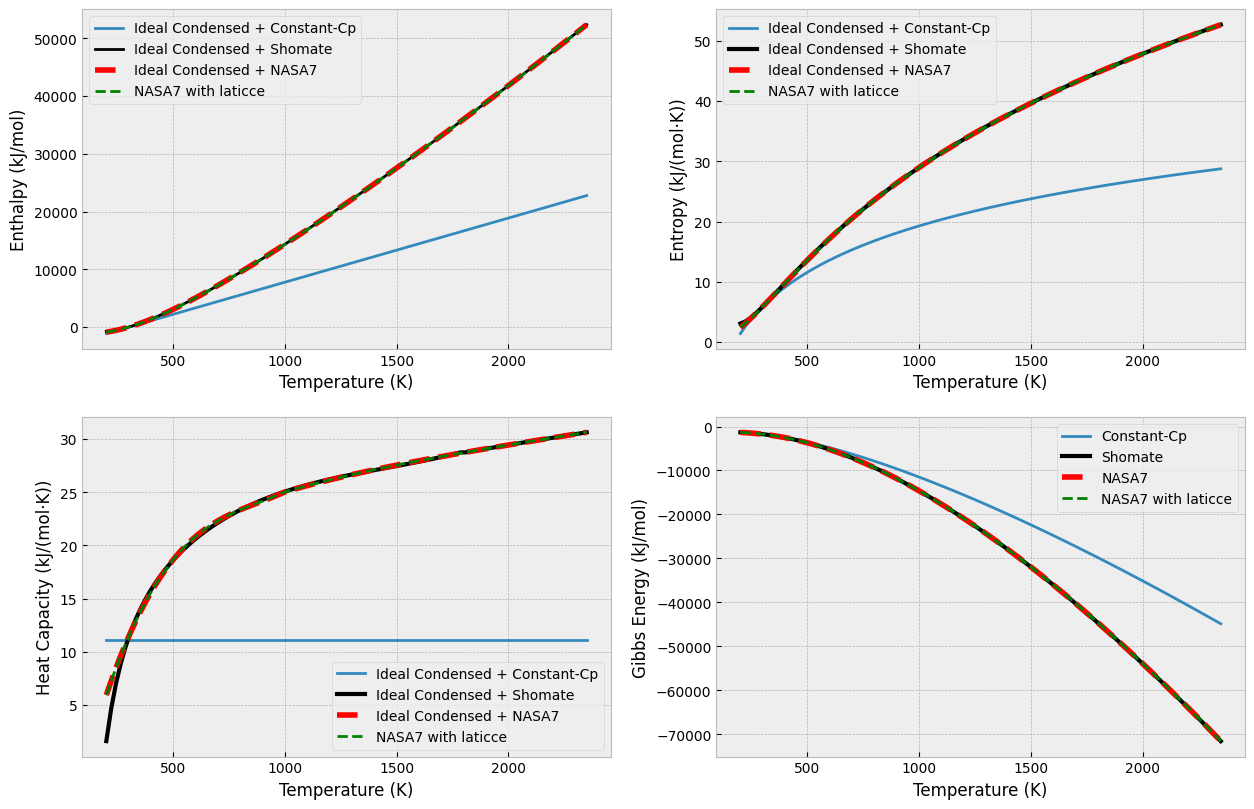

In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

yaml_fixed_stoichiometry = """
phases:
- name: boron_condensed
  thermo: ideal-condensed
  elements: [B]
  species: [B(s)]
  density: 2340
  note: Solid boron phase

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: constant-cp
    h0: 0
    s0: 5860
    cp0: 11100
  equation-of-state:
    model: constant-volume
    molar-volume: 4.62e-6  # Рассчитано как M/density = 0.01081 / 2340
"""

yaml_shomate = """
phases:
- name: boron_condensed
  thermo: ideal-condensed
  elements: [B]
  species: [B(s)]
  density: 2340
  note: Solid boron phase

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: Shomate
    note: α-бора
    temperature-ranges: [298.0, 1800, 2350]
    data:
    - [10.18574, 29.24415, -18.02137, 4.212326, -0.550999, -6.036299, 7.089077]
    - [25.12664, 1.975493, 0.338395, -0.040032, -2.635578, -14.43597, 25.59930]
  equation-of-state:
    model: constant-volume
    molar-volume: 4.62e-6
"""

yaml_nasa7 = """
phases:
- name: boron_condensed
  thermo: ideal-condensed
  elements: [B]
  species: [B(s)]
  density: 2340

species:
- name: B(s)
  composition: {B: 1}
  thermo:
    model: NASA7
    temperature-ranges: [200.0, 1000.0, 2350]
    data:
    - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]
    - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]
  equation-of-state:
    model: constant-volume
    molar-volume: 4.62e-6
"""


def generate_and_plot():
    boron_const = ct.Solution(yaml=yaml_fixed_stoichiometry)
    boron_shomate = ct.Solution(yaml=yaml_shomate)
    boron_nasa = ct.Solution(yaml=yaml_nasa7)
    boron_laticce = ct.Solution(yaml=yaml_lattice)

    temperatures = np.linspace(200, 2350, 100)


    h_const, s_const, cp_const, g_const = [], [], [], []
    for T in temperatures:
        boron_const.TP = T, ct.one_atm
        h_const.append(boron_const.enthalpy_mole)
        s_const.append(boron_const.entropy_mole)
        cp_const.append(boron_const.cp_mole)
        g_const.append(boron_const.gibbs_mole)

    h_shomate, s_shomate, cp_shomate, g_shomate = [], [], [], []
    for T in temperatures:
        boron_shomate.TP = T, ct.one_atm
        h_shomate.append(boron_shomate.enthalpy_mole)
        s_shomate.append(boron_shomate.entropy_mole)
        cp_shomate.append(boron_shomate.cp_mole)
        g_shomate.append(boron_shomate.gibbs_mole)

    h_nasa, s_nasa, cp_nasa, g_nasa, density_fixed = [], [], [], [], []
    for T in temperatures:
        boron_nasa.TP = T, ct.one_atm
        h_nasa.append(boron_nasa.enthalpy_mole)
        s_nasa.append(boron_nasa.entropy_mole)
        cp_nasa.append(boron_nasa.cp_mole)
        g_nasa.append(boron_nasa.gibbs_mole)
        density_fixed.append(boron_nasa.density_mole)

    h_laticce, s_laticce, g_laticce, cp_laticce, density_laticce = [], [], [], [], []
    for T in temperatures:
        boron_laticce.TP = T, ct.one_atm
        h_laticce.append(boron_laticce.enthalpy_mole)
        s_laticce.append(boron_laticce.entropy_mole)
        g_laticce.append(boron_laticce.gibbs_mole)
        cp_laticce.append(boron_laticce.cp_mole)
        density_laticce.append(boron_laticce.density_mole)

    plt.figure(figsize=(15, 15))
    plt.style.use("bmh")

    #Энтальпия
    plt.subplot(3, 2, 1)
    plt.plot(temperatures, np.array(h_const)/1000, label='Ideal Condensed + Constant-Cp')
    plt.plot(temperatures, np.array(h_shomate)/1000, label='Ideal Condensed + Shomate', color="black", linewidth=2)
    plt.plot(temperatures, np.array(h_nasa)/1000, label='Ideal Condensed + NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(h_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Enthalpy (kJ/mol)')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #Энтропия
    plt.subplot(3, 2, 2)
    plt.plot(temperatures, np.array(s_const)/1000, label='Ideal Condensed + Constant-Cp')
    plt.plot(temperatures, np.array(s_shomate)/1000, label='Ideal Condensed + Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(s_nasa)/1000, label='Ideal Condensed + NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(s_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Entropy (kJ/(mol·K))')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #цп
    plt.subplot(3, 2, 3)
    plt.plot(temperatures, np.array(cp_const)/1000, label='Ideal Condensed + Constant-Cp')
    plt.plot(temperatures, np.array(cp_shomate)/1000, label='Ideal Condensed + Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(cp_nasa)/1000, label='Ideal Condensed + NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(cp_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity (kJ/(mol·K))')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)

    #Гиббс
    plt.subplot(3, 2, 4)
    plt.plot(temperatures, np.array(g_const)/1000, label='Constant-Cp')
    plt.plot(temperatures, np.array(g_shomate)/1000, label='Shomate', color="black", linewidth=3)
    plt.plot(temperatures, np.array(g_nasa)/1000, label='NASA7',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(g_laticce)/1000, label='NASA7 with laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Gibbs Energy (kJ/mol)')
    plt.legend()
    #plt.grid(True, linestyle=':', alpha=0.7)
    """
    #Плотность
    plt.subplot(3, 2, 5)
    plt.plot(temperatures, np.array(density_fixed)/1000, label='Fixeds-toichiometry',linestyle="--", color="red", linewidth=4)
    plt.plot(temperatures, np.array(density_laticce)/1000, label='Laticce',linestyle="--", color="green", linewidth=2)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Плотность (kmol/m3)')
    plt.legend()

    plt.tight_layout()
    plt.savefig("boron_comparison.png")
    plt.show()
    """
generate_and_plot()